### ***`Linear, Matrix Alzebra & Probability` using Python***

##### **This notebook is created with an objective to implement some daily usage functions from scratch.**
---

#### **Notebook Contents**

1. [DOT product](#Matrices-DOT_product)
    1. [CASE-1.1 : 1-d arrays](#CASE-1.1)
    2. [CASE-1.2 : 2x2 matrices](#CASE-1.2)
    3. [CASE-1.3 : Non-square matrices](#CASE-1.3)
    4. [CASE-1.4 : 3x3 matrices](#CASE-1.4)
2. [Cosine Similarity](#Cosine_similarity)
    1. [Vectors Magnitude](#Vectors_Magnitude)
3. [QQ plot](#Generate_QQ_plot)
    1. [Normally Distributed Data](#Normal_Dist)
    2. [Log-Normal Distributed Data](#Log-Normal_Dist)
4. [Some Matrix Operations](#Some_Matrix_operations)
5. [How to generate the histogram?](#Generate_histogram)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from functools import reduce
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

### **Matrices-DOT_product**

#### **CASE-1.1**
##### **1-d arrays**

In [2]:
A = np.array([1,4,7])
B = np.array([3,5,2])

In [3]:
A.shape, B.shape

((3,), (3,))

In [4]:
A.ndim, B.ndim

(1, 1)

In [5]:
def dot_product_1d(vec1, vec2):
    """
    Description: This function is created for generating dot product result of 1-d arrays.
    Inputs: It accepts two inputs:
        1. vec1 : 1-d numpy array
        2. vec2 : 1-d numpy array
        
    Return:
        dot_result : DOT product of two 1-d arrays.
    """
    prd_vals = []
    for idx in enumerate(vec1):
        elements_prd = vec1[idx[0]] * vec2[idx[0]]
        prd_vals.append(elements_prd)
    
    ## Way -1 : Using global sum method
    dot_result = sum(prd_vals)
    
    ## Way -2 : Using numpy sum
    # dot_result = np.sum(prd_vals)
    
    ## Way -3 : Using reduce function with lambda
    # dot_result = reduce(lambda x,y:x+y,prd_vals)
    
    return np.sum(prd_vals)

In [6]:
dot_product_1d(A,B)

37

##### **Match the results**

In [7]:
np.dot(A,B)

37

In [8]:
A @ B

37

##### **Bingo!! All matched above**

#### **CASE-1.2**
##### **2x2 matrices**

In [9]:
A2 = np.array([[1,4],[3,6]])
B2 = np.array([[2,1],[4,5]])

In [10]:
A2.shape, B2.shape

((2, 2), (2, 2))

In [11]:
A2.ndim, B2.ndim

(2, 2)

In [12]:
def dot_product_2d(m1,m2):
    """
    Description: This function is created for generating dot product result of 2-d matrices.
    Inputs: It accepts two inputs:
        1. m1 : 2-d numpy array
        2. m2 : 2-d numpy array
        
    Return:
        dot_prds : DOT product of two 2-d matrices.
    """
    dot_prds = []
    for ix_a in enumerate(m1):
        vals = []
        for ix_b in enumerate(m2.T):
            vals.append(dot_product_1d(m1[ix_a[0]], m2.T[ix_b[0]]))
        dot_prds.append(vals)
    
    return np.array(dot_prds)   

In [13]:
dot_product_2d(A2,B2)

array([[18, 21],
       [30, 33]])

##### **Match the results**

In [14]:
np.dot(A2,B2)

array([[18, 21],
       [30, 33]])

In [15]:
A2 @ B2

array([[18, 21],
       [30, 33]])

##### **Bingo!! All matched above**

#### **CASE-1.3**
##### **Non-square shape matrices**

In [16]:
A3 = np.array([[1,4,5],[3,6,7]])
B3 = np.array([[2,1,3],[4,5,1]])

In [17]:
A3.shape, B3.shape

((2, 3), (2, 3))

In [18]:
A3.ndim, B3.ndim

(2, 2)

In [19]:
dot_product_2d(A3,B3.T)

array([[21, 29],
       [33, 49]])

##### **Match the results**

In [20]:
np.dot(A3,B3.T)

array([[21, 29],
       [33, 49]])

In [21]:
A3 @ B3.T

array([[21, 29],
       [33, 49]])

##### **Bingo!! All matched above**

#### **CASE-1.4**
##### **3x3 matrices**

In [22]:
A4 = np.array([[1,4,5],[3,6,7],[5,6,7]])
B4 = np.array([[2,1,3],[4,5,1],[7,3,2]])

In [23]:
A4.shape, B4.shape

((3, 3), (3, 3))

In [24]:
A4.ndim, B4.ndim

(2, 2)

In [25]:
dot_product_2d(A4,B4)

array([[53, 36, 17],
       [79, 54, 29],
       [83, 56, 35]])

##### **Match the results**

In [26]:
np.dot(A4,B4)

array([[53, 36, 17],
       [79, 54, 29],
       [83, 56, 35]])

In [27]:
A4 @ B4

array([[53, 36, 17],
       [79, 54, 29],
       [83, 56, 35]])

##### **Bingo!! All matched above**

### **Cosine_similarity**
#### **Two 1-d vectors**

In [28]:
A, B

(array([1, 4, 7]), array([3, 5, 2]))

In [29]:
A2, B2

(array([[1, 4],
        [3, 6]]),
 array([[2, 1],
        [4, 5]]))

In [30]:
A3, B3

(array([[1, 4, 5],
        [3, 6, 7]]),
 array([[2, 1, 3],
        [4, 5, 1]]))

##### **Vectors_Magnitude**

In [31]:
def vector_magnitude(vect):
    """
    Description: This function is created for calculating the magnitude of the vector
    Input: It accepts only one parameter:
        1. vect: np.array
            Vector whose magnitude to be calculated
    Return: Calculated length/magnitude of the vector
        vect_mag
    """
    if len(vect.shape) == 1:
        vect = [vect]

    flatten = lambda x : [element for row in x for element in row]
    flat_vect = flatten(vect)
    sqrd_elements_sum = reduce(lambda x,y:x+y,[element**2 for element in flat_vect])
    vect_mag = np.sqrt(sqrd_elements_sum)
    return vect_mag

In [32]:
## Vectors magnitude
vector_magnitude(A),vector_magnitude(B), vector_magnitude(A2),vector_magnitude(B2), vector_magnitude(A3),vector_magnitude(B3)

(8.12403840463596,
 6.164414002968976,
 7.874007874011811,
 6.782329983125268,
 11.661903789690601,
 7.483314773547883)

In [33]:
## Numpy generated vector's magnitude
np.linalg.norm(A), np.linalg.norm(B), np.linalg.norm(A2), np.linalg.norm(B2), np.linalg.norm(A3), np.linalg.norm(B3)

(8.12403840463596,
 6.164414002968976,
 7.874007874011811,
 6.782329983125268,
 11.661903789690601,
 7.483314773547883)

##### **Bingo!! All matched above**

In [34]:
def cosine_sim(vect1,vect2):
    """
    Description: This function is created for finding the cosine similarity b/w 2 vectors.
    Input: It accepts 2 parameters:
        1. vect1: np.array
        2. vect2: np.array
    Return: Calculate the cosine similarity
        vects_cosine_similarity
    """
    dot_prd_vects = dot_product_1d(vect1,vect2)
    vect1_mag = vector_magnitude(vect1)
    vect2_mag = vector_magnitude(vect2)
    
    vects_cosine_similarity = dot_prd_vects / (vect1_mag * vect2_mag)
    
    return vects_cosine_similarity

In [35]:
## Self-implementation
cosine_sim(A,B)

0.7388188340435563

In [36]:
## Sklearn result
cosine_similarity([A],[B])

array([[0.73881883]])

##### **Bingo!! results matched**

### **Generate_QQ_plot**

In [37]:
from statsmodels.graphics.gofplots import qqplot

##### **Normal_Dist**

In [38]:
np.random.seed(33)
Aq = np.random.normal(size=200)

In [39]:
Aq_percentiles = []
percentiles_100 = np.arange(start=1,stop=101,step=1)
Aq_100_percentiles = np.percentile(Aq,percentiles_100)
sorted_Aq_100_percentiles = np.sort(Aq_100_percentiles)
sorted_Aq_100_percentiles

array([-2.46599034e+00, -2.20718808e+00, -1.93756264e+00, -1.90145355e+00,
       -1.85187748e+00, -1.70389613e+00, -1.65477286e+00, -1.54063889e+00,
       -1.47095411e+00, -1.41252529e+00, -1.35914329e+00, -1.24005629e+00,
       -1.21815039e+00, -1.17260255e+00, -1.14471007e+00, -1.12181570e+00,
       -1.09882312e+00, -1.08945676e+00, -1.06780572e+00, -1.00372920e+00,
       -9.82088295e-01, -9.52161294e-01, -9.42296878e-01, -9.07972048e-01,
       -8.95722484e-01, -8.23487807e-01, -7.71375816e-01, -7.48173002e-01,
       -6.98078059e-01, -6.74285594e-01, -6.45210123e-01, -6.37765139e-01,
       -6.22855228e-01, -6.09429380e-01, -5.76342200e-01, -5.43078094e-01,
       -4.86952908e-01, -4.61321046e-01, -4.17134964e-01, -3.56951384e-01,
       -3.39976411e-01, -3.03754735e-01, -2.41162835e-01, -2.19266416e-01,
       -1.99036183e-01, -1.69834334e-01, -1.54899113e-01, -1.47856249e-01,
       -1.28421081e-01, -1.00257198e-01, -2.01397309e-02,  7.19443110e-04,
        1.19903444e-02,  

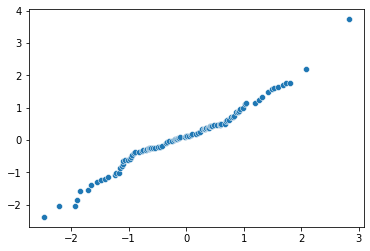

In [40]:
sns.scatterplot(x=sorted_Aq_100_percentiles,y=np.sort(np.random.normal(size=100)));

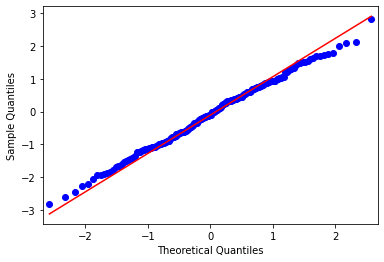

In [41]:
qqplot(Aq,line='q');

##### **Bingo!! Looks quite similar**

##### **Log-Normal_Dist**

In [42]:
Aq_log = np.random.lognormal(size=200)

In [43]:
Aq_log_percentiles = []
Aq_log_100_percentiles = np.percentile(np.log(Aq_log),percentiles_100)
sorted_Aq_log_100_percentiles = np.sort(Aq_log_100_percentiles)
sorted_Aq_log_100_percentiles

array([-2.33820973, -2.15270392, -2.02422615, -1.72585197, -1.62549138,
       -1.59856845, -1.49991339, -1.25393201, -1.22995031, -1.20401731,
       -1.19024699, -1.15117659, -1.06548097, -1.05532187, -1.04395245,
       -0.97042171, -0.86805412, -0.84764827, -0.82974912, -0.82575889,
       -0.79834578, -0.75447177, -0.67881047, -0.67475326, -0.62189926,
       -0.60935312, -0.58807236, -0.56751884, -0.53181589, -0.50453319,
       -0.42546144, -0.40505289, -0.39422791, -0.3769809 , -0.35080662,
       -0.3425501 , -0.30923394, -0.24694726, -0.23044649, -0.22405655,
       -0.21567083, -0.18650033, -0.13029206, -0.12363573, -0.0942395 ,
       -0.0662814 , -0.03149388, -0.02263501, -0.00454816,  0.01169328,
        0.05943071,  0.07636514,  0.08926398,  0.09381723,  0.09865338,
        0.11533098,  0.1361097 ,  0.15232059,  0.16282453,  0.2158422 ,
        0.21984901,  0.24099094,  0.25983132,  0.27837256,  0.31617368,
        0.32973924,  0.34098613,  0.34951088,  0.38557789,  0.40

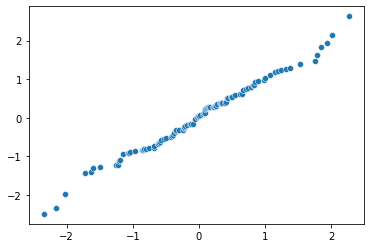

In [44]:
sns.scatterplot(x=sorted_Aq_log_100_percentiles,y=np.sort(np.random.normal(size=100)));

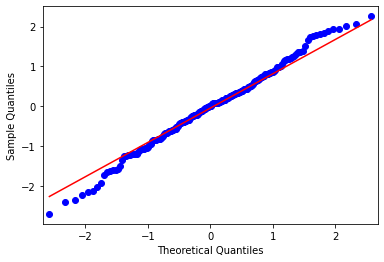

In [45]:
qqplot(np.log(Aq_log),line='q');

##### **Bingo!! Looks quite similar**

### **Some_Matrix_operations**
- Cross-product
- Minors
    - Minors of Diagonals
- Co-factors
- Adjugate
- Determinant
- Inverse
- Trace --> (Sum of Diagonal elements)

In [46]:
from IPython.display import Image

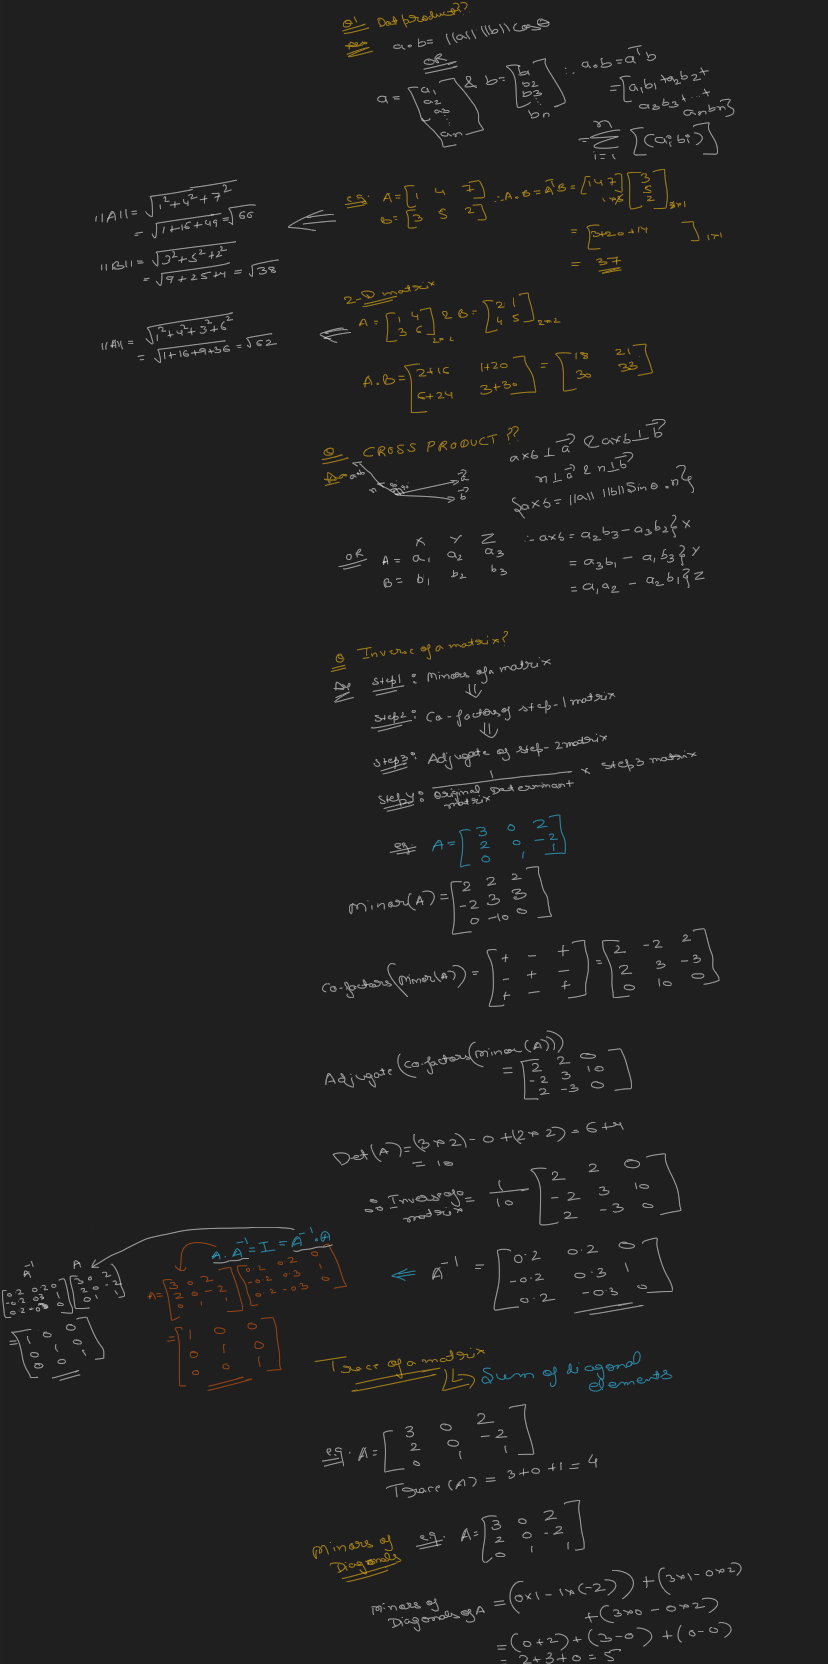

In [47]:
## Solve this question
Image("Some_Matrix_Operations.png",width=1000,height=1000)

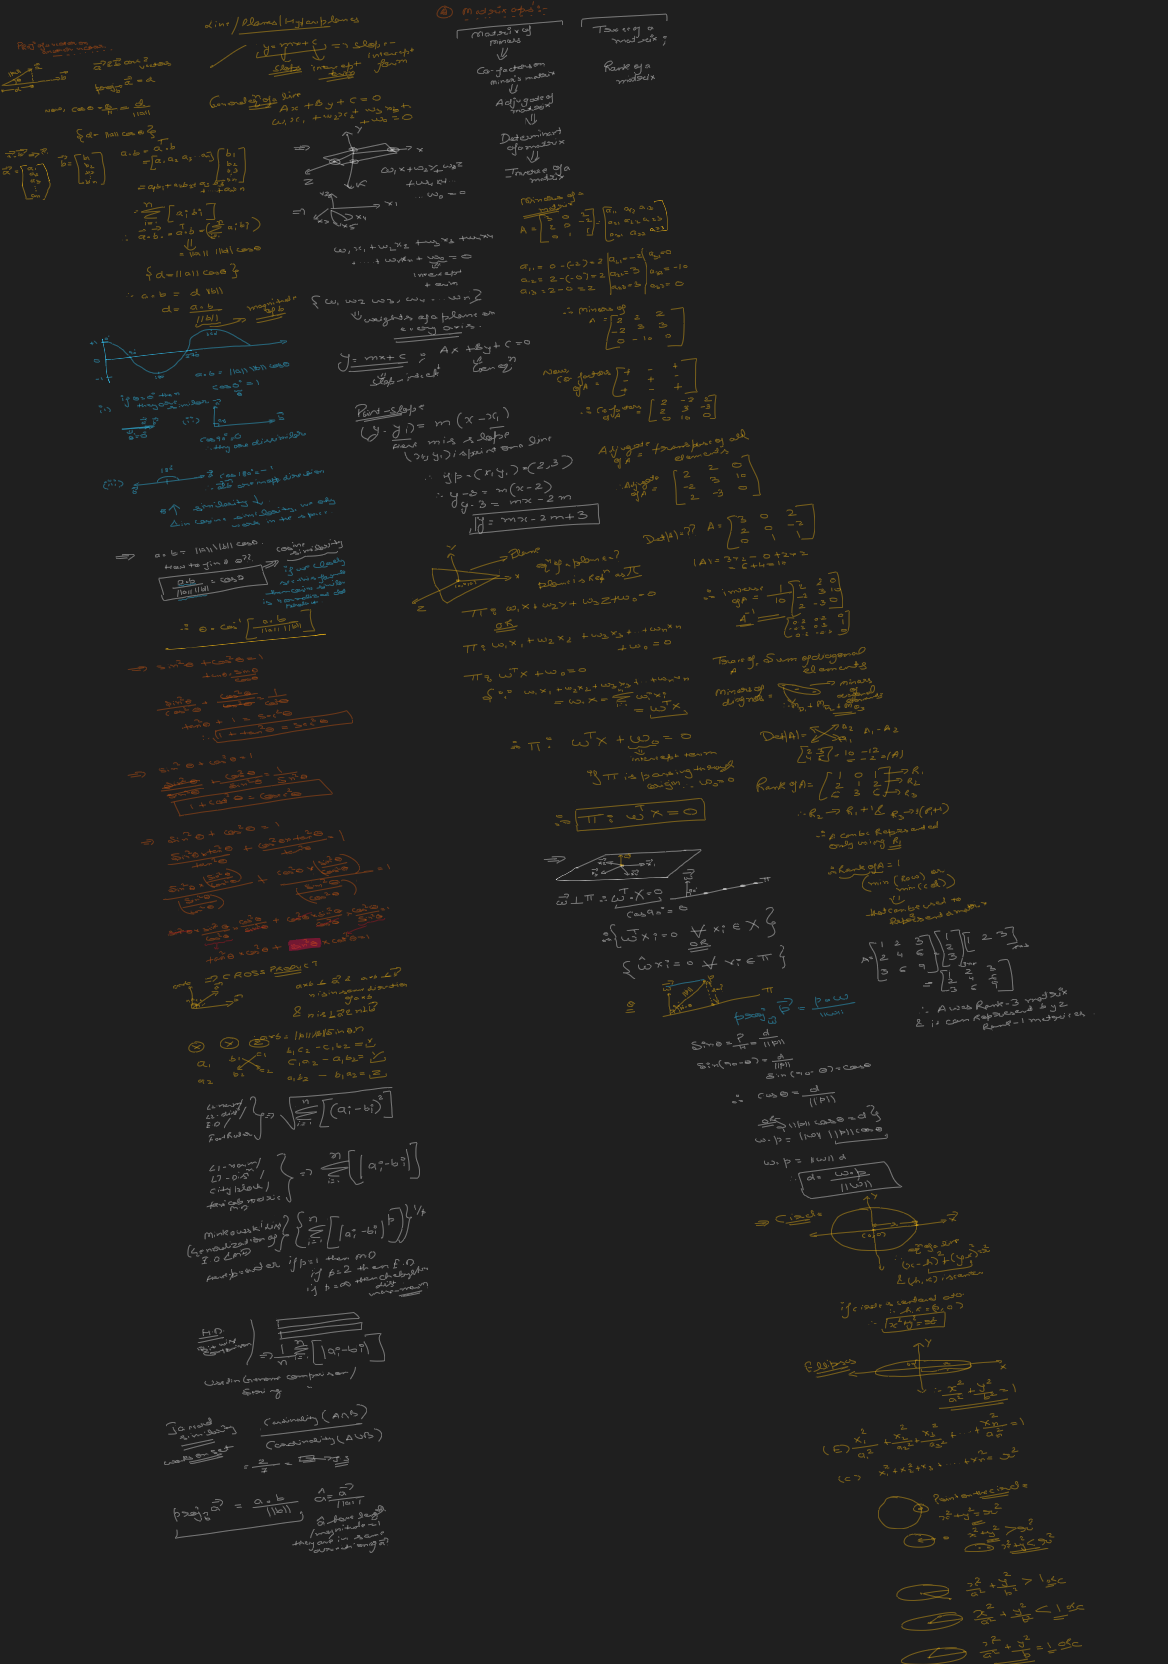

In [48]:
## Solve this question
Image("Linear_Matrix_Alzebra.png",width=1000,height=1000)

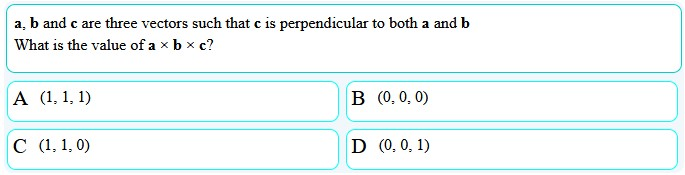

In [49]:
## Solve this question
Image("Matrix_Alzebra_Q1.jpg")

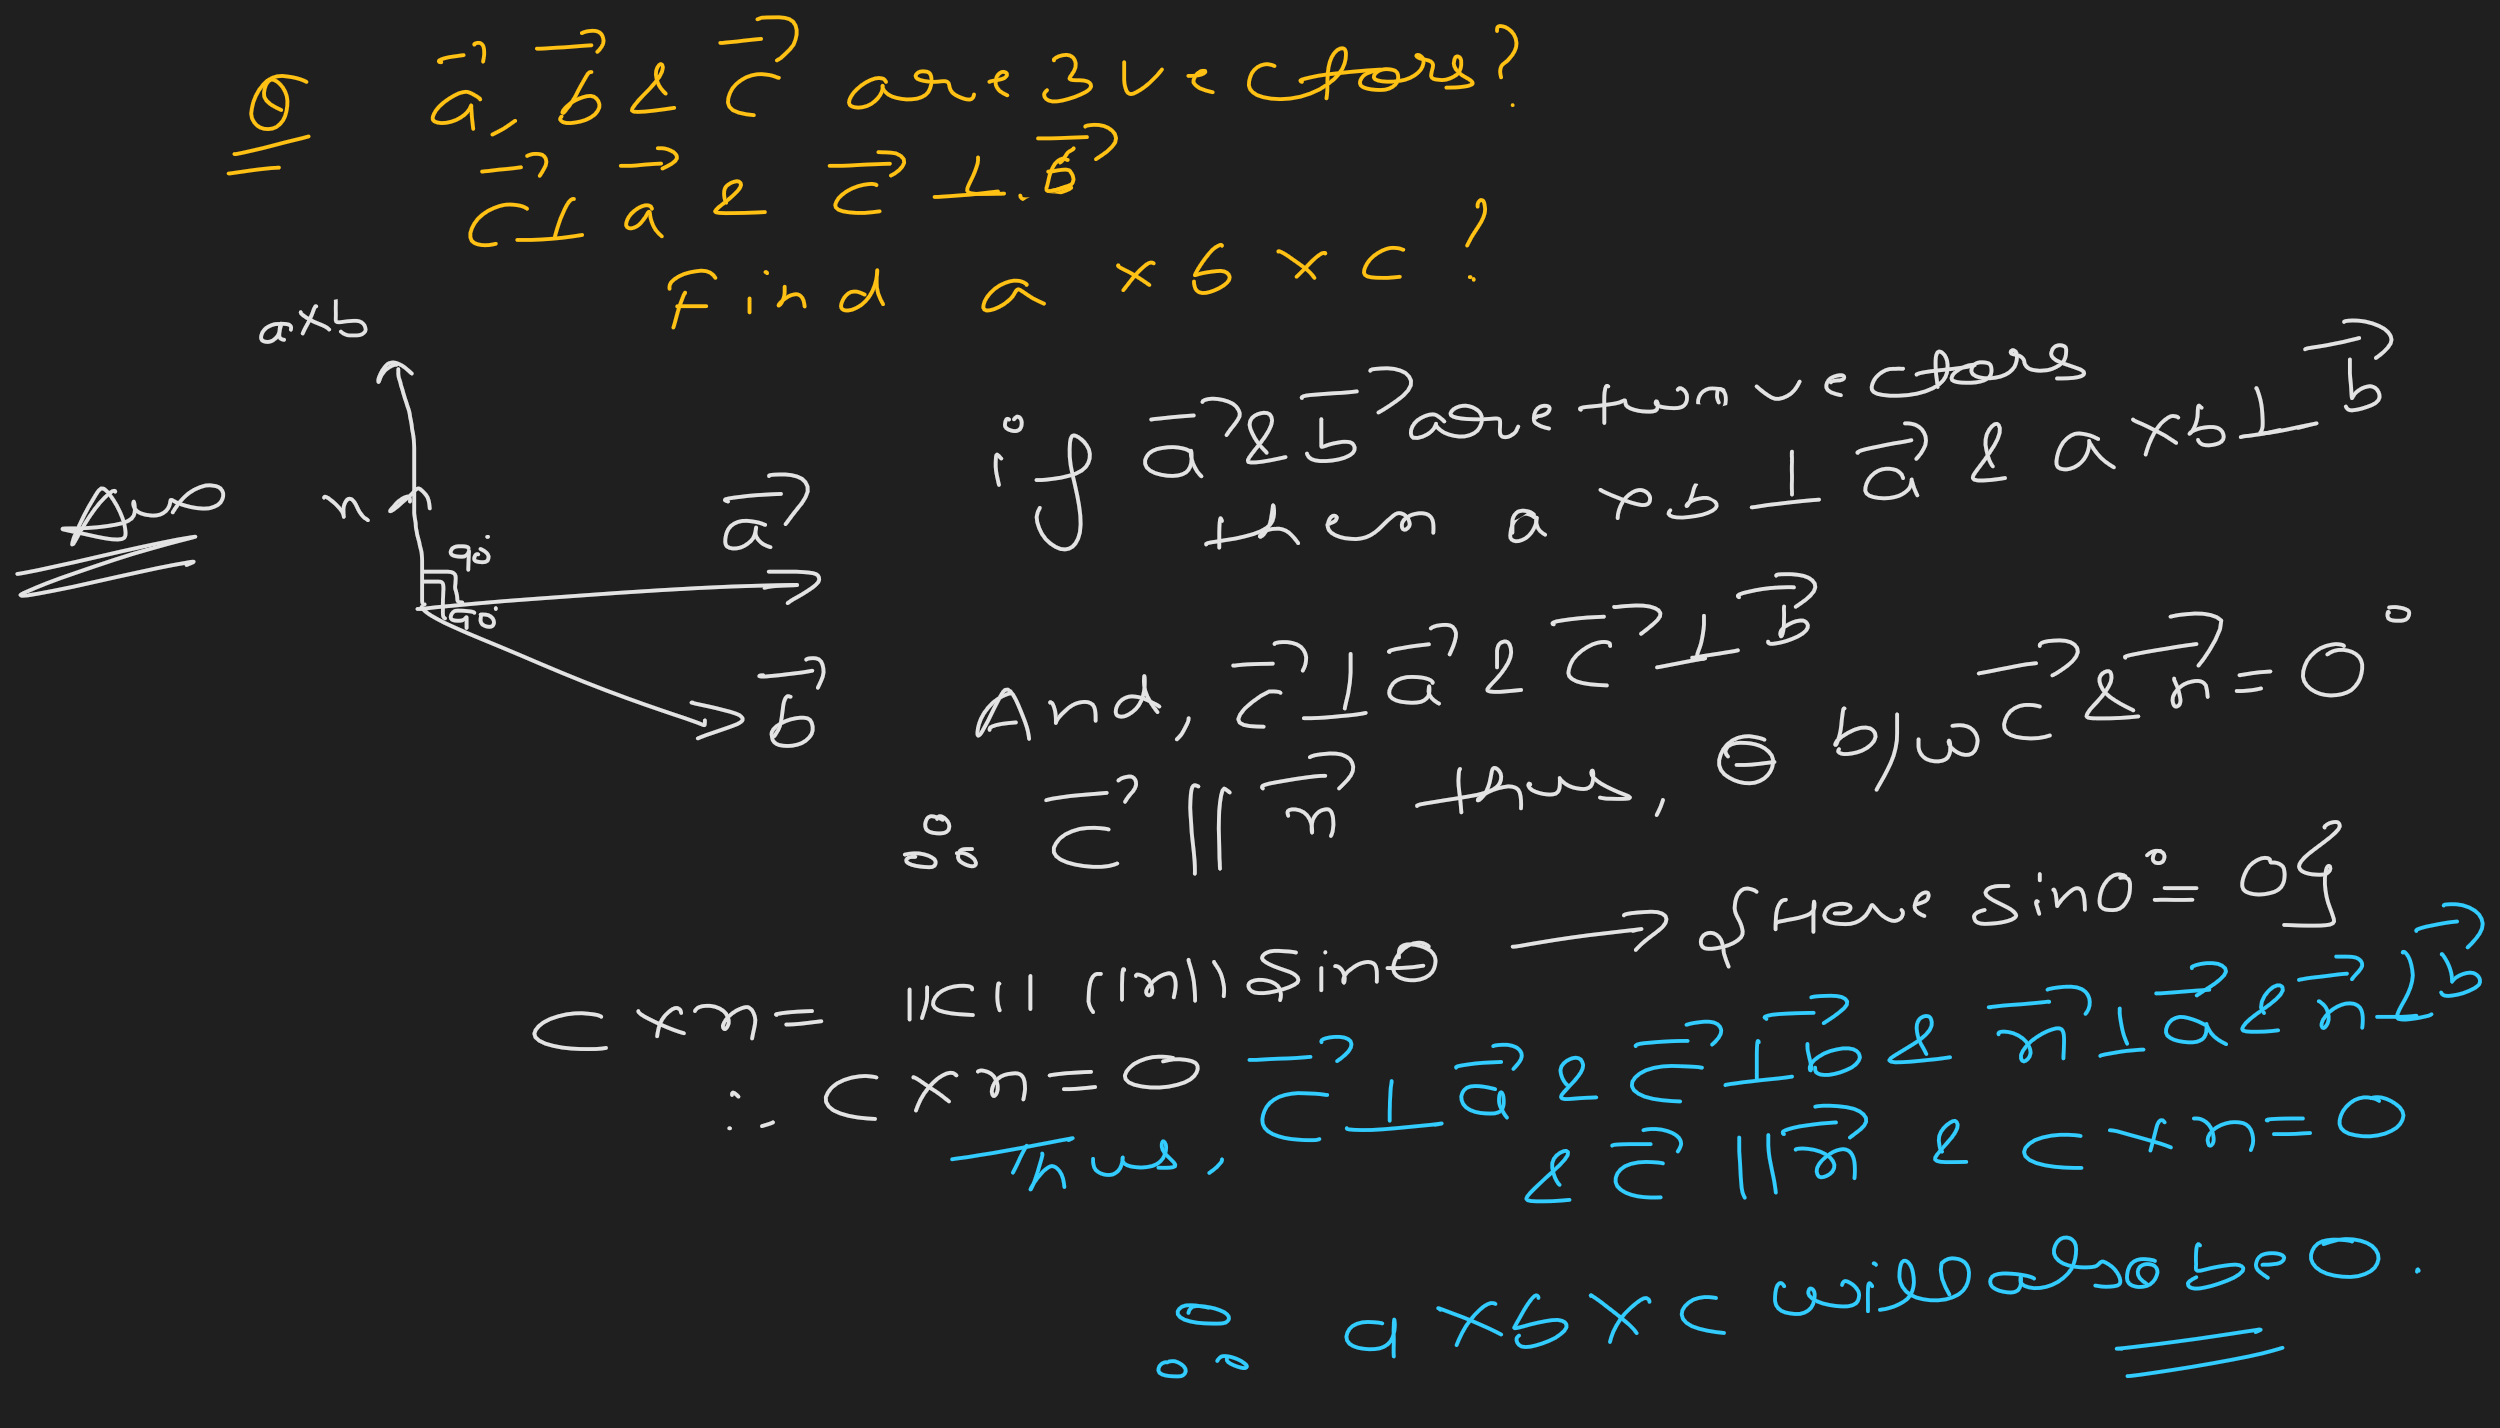

In [50]:
Image("Cross_prd_qs.png")

### **Generate_histogram**
#### **How to plot the histogram of a data?**

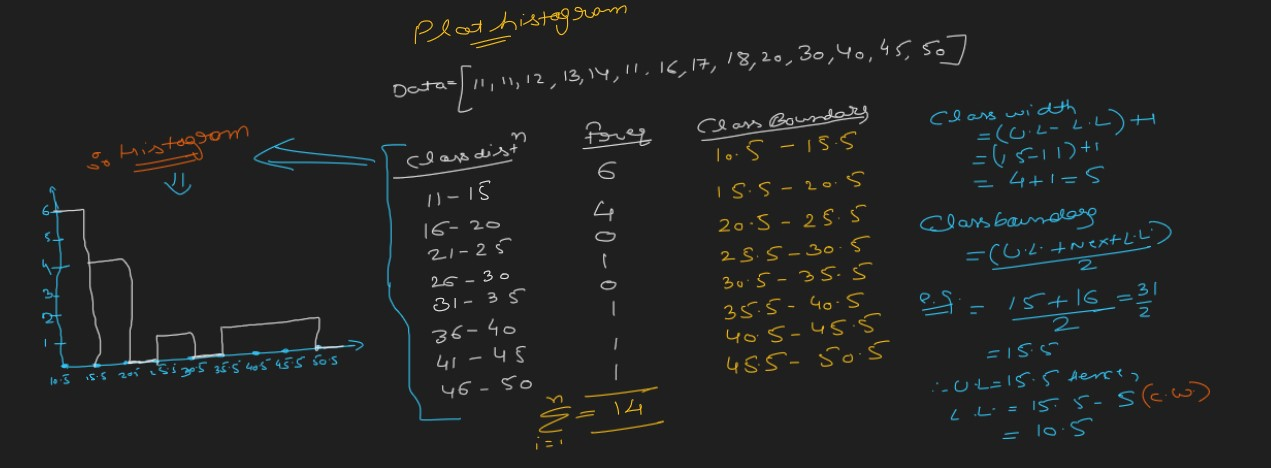

In [51]:
Image("Plot_Histogram.jpg",width=1000,height=1000)

In [52]:
def plot_hist(data,cw=5):
    """
    Description : This function is created for plotting the histogram of data.
    
    Input: It accepts below parameters:
        1. data : For which histogram to be plotted
        2. cw : class width == 5
    
    Return: Plot the graph and returns the dataframe with values
    """
    class_width = cw
    
    # Sort the data in ascending order
    hist_data_srt = np.sort(hist_data)
    
    # Calculate the no. of required classes
    no_of_classes = int(np.ceil((max(hist_data_srt) - min(hist_data_srt))/class_width))
    
    # Generate the class_limits list
    class_limits = []
    class_limits.append(hist_data_srt.min())
    for i in range(1,(no_of_classes*2),1):
        if i%2 != 0:
            class_limits.append(class_limits[-1]+4)
        else:
            class_limits.append(class_limits[-1]+1)
    
    # Calculate the upper_limit of class_boundary
    ul = (class_limits[1] + class_limits[2])/2
    
    # Calulate the difference between class_boundary and class_distn raw data value
    diff = ul - class_limits[1]
    
    # Substracting the diff from raw class values
    cb = [i[1]-diff if i[0]%2 == 0 else i[1]+diff for i in enumerate(class_limits)]
    
    # Bucketing the class_distribution and class_boundaries rows
    intrvals = [i for i in range(len(cb)) if i%2 == 0]    
    class_distn_cb = []
    for idx in intrvals:
        class_distn_cb.append([cb[idx],cb[idx+1]])
     
    class_distn = []
    for idx in intrvals:
        class_distn.append([class_limits[idx],class_limits[idx+1]])
    
    # Calculating the Frequency of data in the range
    freq = []
    for i in range(len(class_distn)):
        freq.append(len([val for val in hist_data_srt if (val >= class_distn[i][0]) & (val <= class_distn[i][1])]))
    
    # Preparaing the data in the dataframe
    class_distn_df = pd.DataFrame([class_distn]).T
    class_distn_df.columns = ['Class_Distribution']

    freq_df = pd.DataFrame(freq)
    freq_df.columns = ['Frequency']

    class_distn_cb_df = pd.DataFrame([class_distn_cb]).T
    class_distn_cb_df.columns = ['Class_Boundaries']

    class_data_df = pd.concat([class_distn_df,freq_df,class_distn_cb_df],axis=1)
    class_data_df['Class_Boundaries'] = class_data_df['Class_Boundaries'].astype(str)
    
    # Plotting the graph
    with plt.style.context('seaborn'):
        plt.figure(figsize=(12,6))
        sns.barplot(x=class_data_df['Class_Boundaries'],y=class_data_df['Frequency'],color='blue')
        plt.title("Histogram of input data",fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
        plt.xlabel("Class Boundaries",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
        plt.ylabel("Frequency",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
        plt.grid(which='major',color='pink',linestyle='--')
        plt.xticks(size=11,style='oblique',rotation=10)
        plt.show()    
    
    return class_data_df

In [53]:
hist_data = [11,11,12,13,14,11,16,17,18,20,30,40,45,50]

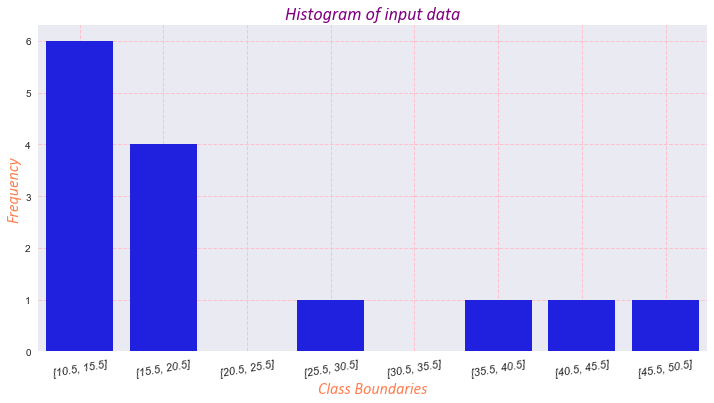

,Class_Distribution,Frequency,Class_Boundaries
0,"[11, 15]",6,"[10.5, 15.5]"
1,"[16, 20]",4,"[15.5, 20.5]"
2,"[21, 25]",0,"[20.5, 25.5]"
3,"[26, 30]",1,"[25.5, 30.5]"
4,"[31, 35]",0,"[30.5, 35.5]"
5,"[36, 40]",1,"[35.5, 40.5]"
6,"[41, 45]",1,"[40.5, 45.5]"
7,"[46, 50]",1,"[45.5, 50.5]"


In [54]:
plot_hist(hist_data)

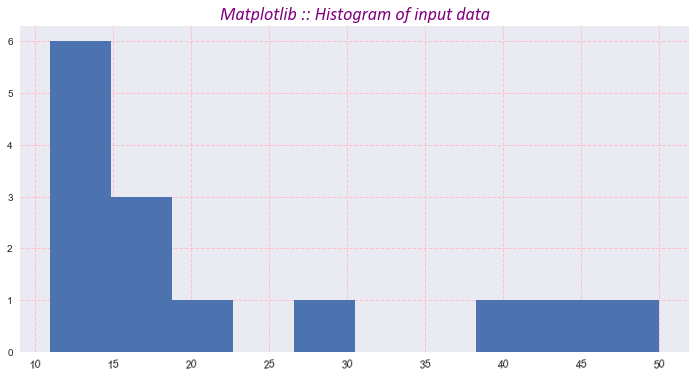

In [55]:
# Matplotlib histogram
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    plt.hist(hist_data)
    plt.title("Matplotlib :: Histogram of input data",fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
    plt.xticks(size=11,style='oblique',rotation=10)
    plt.grid(which='major',color='pink',linestyle='--')
    plt.show() 